# SS_WeatherPy
----

#### Analysis
Observation 1 - there is a strong correlation between latitude and temperature. Cities that are closer to the equator have a higher max temperature. This is true for both the Northern and Southern Hemispheres 
Observation 2 - There is little correlation between humidity and latitude. After looking into the data there are cities that have over 90% humidty but max temperatures of less than 0. So humidity is not dependant on hot weather. 
Observation 3 - Wind speed had a the lowest correlation with an r value of less than 0.10. This is reasonable since there are many factors which can influence wind speed other than latitude/temperature. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from config import api_key
import json
import requests
import os
from citipy import citipy
import numpy as np
# from ratelimit import limits, sleep_and_retry


# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lat = np.random.uniform(lat_range[0], lat_range[1], size=1400)
lng = np.random.uniform(lng_range[0], lng_range[1], size=1400)
lat_lngs = zip(lat, lng)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

597

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Create a data frame from city results 

cities_df = pd.DataFrame({"City": cities})
cities_df


# Create blank columns 
cities_df["Lat"] = "" 
cities_df["Lng"] = "" 
cities_df["Max Temp"] = "" 
cities_df["Humidity"] = "" 
cities_df["Cloudiness"] = ""  
cities_df["Wind Speed"] = "" 
cities_df["Country"] = "" 
cities_df["Date"] = "" 
                

# Use open weather API
# Add URL and parameters

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="


# Create new lists for the data frame 
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
Date = []

# Add a counter to list the city number 
counter = 0 


# Print the start of the output 
print("Beginning Data Retrieval")
print("-------------------------------")


# loop through the cities found from citypy 

for index, row in cities_df.iterrows():
    city_search = row["City"]
#     Increase the counter to count the cities 
    counter += 1

#     search open weather API for information on each city   
    response = requests.get(query_url + city_search)
    response_json = response.json()
        
                
#     return response
#     Populate the columns with the results 
    try:
        cities_df.loc[index, "Lat"] = response_json['coord']['lat']
        cities_df.loc[index, "Lng"] = response_json['coord']['lon']
        cities_df.loc[index, "Max Temp"] = response_json['main']['temp_max']
        cities_df.loc[index, "Humidity"] = response_json['main']['humidity']
        cities_df.loc[index, "Cloudiness"] = response_json['clouds']['all']
        cities_df.loc[index, "Wind Speed"] = response_json['wind']['speed']
        cities_df.loc[index, "Country"] = response_json['sys']['country']
        cities_df.loc[index, "Date"] = response_json['dt']
        
        print(f" Processing Record {counter} | {city_search}")

    except:
        print("City not found. Skipping...")
        pass 

print("-------------------------------")
print("Data Retrieval Complete")
print("-------------------------------")

Beginning Data Retrieval
-------------------------------
City not found. Skipping...
 Processing Record 2 | hobart
 Processing Record 3 | kharan
 Processing Record 4 | itarema
 Processing Record 5 | bredasdorp
City not found. Skipping...
 Processing Record 7 | ushuaia
 Processing Record 8 | katsuura
 Processing Record 9 | davenda
 Processing Record 10 | vaini
 Processing Record 11 | yar-sale
 Processing Record 12 | kondopoga
 Processing Record 13 | egvekinot
City not found. Skipping...
 Processing Record 15 | yumen
 Processing Record 16 | flinders
 Processing Record 17 | punta arenas
 Processing Record 18 | new norfolk
 Processing Record 19 | pingliang
City not found. Skipping...
City not found. Skipping...
 Processing Record 22 | dongfeng
 Processing Record 23 | bengkulu
City not found. Skipping...
 Processing Record 25 | isangel
 Processing Record 26 | kulhudhuffushi
 Processing Record 27 | arraial do cabo
 Processing Record 28 | nalut
 Processing Record 29 | jamestown
 Processing Re

 Processing Record 246 | alizai
 Processing Record 247 | kijang
 Processing Record 248 | cabo san lucas
 Processing Record 249 | sars
City not found. Skipping...
City not found. Skipping...
 Processing Record 252 | fukuma
 Processing Record 253 | bethel
 Processing Record 254 | bang racham
 Processing Record 255 | hervey bay
 Processing Record 256 | brake
 Processing Record 257 | khandyga
 Processing Record 258 | kodiak
 Processing Record 259 | lewiston
City not found. Skipping...
 Processing Record 261 | mamallapuram
 Processing Record 262 | vila velha
 Processing Record 263 | avera
City not found. Skipping...
 Processing Record 265 | maiduguri
City not found. Skipping...
 Processing Record 267 | porto nacional
 Processing Record 268 | camocim
 Processing Record 269 | zambezi
 Processing Record 270 | jedburgh
 Processing Record 271 | asau
 Processing Record 272 | necochea
 Processing Record 273 | henties bay
City not found. Skipping...
 Processing Record 275 | deputatskiy
 Processing 

 Processing Record 488 | chapais
 Processing Record 489 | avallon
 Processing Record 490 | lorengau
City not found. Skipping...
 Processing Record 492 | paamiut
 Processing Record 493 | ledyard
 Processing Record 494 | riyadh
 Processing Record 495 | bereznik
 Processing Record 496 | palembang
 Processing Record 497 | hay river
 Processing Record 498 | conceicao do araguaia
City not found. Skipping...
 Processing Record 500 | peleduy
City not found. Skipping...
 Processing Record 502 | hofn
 Processing Record 503 | the valley
 Processing Record 504 | darlowo
 Processing Record 505 | marialva
City not found. Skipping...
 Processing Record 507 | muros
 Processing Record 508 | coihaique
 Processing Record 509 | kysyl-syr
 Processing Record 510 | sola
 Processing Record 511 | natchez
 Processing Record 512 | oktyabrskoye
 Processing Record 513 | san patricio
 Processing Record 514 | camana
 Processing Record 515 | atar
 Processing Record 516 | zhuhai
 Processing Record 517 | punta de bombo

In [6]:
cities_df.head(5)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,barentsburg,,,,,,,,
1,hobart,-42.8794,147.329,14,51,40,7.72,AU,1619341781
2,kharan,28.5833,65.4167,35.9,9,0,3.95,PK,1619341633
3,itarema,-2.9248,-39.9167,24.17,90,89,3.39,BR,1619341930
4,bredasdorp,-34.5322,20.0403,15,88,100,3.09,ZA,1619341664


In [9]:
#Drop empty values. Fill the blanks with NaN so we can drop them 

nan_value = float('NaN')

cities_df.replace("", nan_value, inplace=True)

city_list_df = cities_df.dropna(axis=0, how='any', inplace=False)

city_list_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,hobart,-42.8794,147.3294,14.00,51.0,40.0,7.72,AU,1.619342e+09
2,kharan,28.5833,65.4167,35.90,9.0,0.0,3.95,PK,1.619342e+09
3,itarema,-2.9248,-39.9167,24.17,90.0,89.0,3.39,BR,1.619342e+09
4,bredasdorp,-34.5322,20.0403,15.00,88.0,100.0,3.09,ZA,1.619342e+09
6,ushuaia,-54.8000,-68.3000,8.00,71.0,0.0,5.14,AR,1.619341e+09
7,katsuura,35.1333,140.3000,20.00,49.0,40.0,3.60,JP,1.619342e+09
8,davenda,53.5556,119.3170,15.74,15.0,83.0,3.91,RU,1.619342e+09
9,vaini,-21.2000,-175.2000,24.00,94.0,75.0,2.57,TO,1.619342e+09
10,yar-sale,66.8333,70.8333,-0.01,98.0,100.0,4.00,RU,1.619342e+09
11,kondopoga,62.2057,34.2614,7.00,87.0,90.0,3.00,RU,1.619342e+09


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
city_list_df.to_csv("../Output/cities.csv", index=True)

city_list_df.head(5)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,hobart,-42.8794,147.3294,14.00,51.0,40.0,7.72,AU,1.619342e+09
2,kharan,28.5833,65.4167,35.90,9.0,0.0,3.95,PK,1.619342e+09
3,itarema,-2.9248,-39.9167,24.17,90.0,89.0,3.39,BR,1.619342e+09
4,bredasdorp,-34.5322,20.0403,15.00,88.0,100.0,3.09,ZA,1.619342e+09
6,ushuaia,-54.8000,-68.3000,8.00,71.0,0.0,5.14,AR,1.619341e+09


In [23]:
# get the summary table 

city_list_df.describe()


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,5.400000e+02
mean,20.674608,11.910418,16.287981,70.559259,56.498148,3.375852,1.619342e+09
std,33.115328,90.051848,11.550349,22.779214,38.593813,2.256639,8.330643e+01
min,-54.800000,-179.166700,-17.000000,4.000000,0.000000,0.300000,1.619341e+09
25%,-5.150750,-68.784350,7.780000,60.750000,20.000000,1.660000,1.619342e+09
50%,23.807200,13.269100,17.220000,76.000000,69.500000,3.015000,1.619342e+09
75%,48.657775,90.852575,25.705000,88.000000,94.000000,4.442500,1.619342e+09
max,78.218600,179.316700,42.000000,100.000000,100.000000,16.640000,1.619342e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

# humiditiy not greater than 100

In [26]:
#  Get the indices of cities that have humidity over 100%.




In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

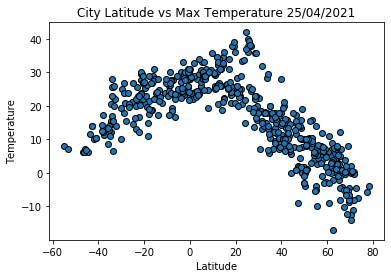

In [64]:
# plot lat vs max temp 

# set x and y values 
x_values = city_list_df['Lat']
y_values = city_list_df["Max Temp"]

# plot graph and add titles & labels 
plt.scatter(x_values,y_values, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title("City Latitude vs Max Temperature 25/04/2021")

# Save png file
plt.savefig("../Output/lat_vs_Temp.png")

plt.show()


# Analysis - as you move further from the equator, the temperatures start to decrease 

## Latitude vs. Humidity Plot

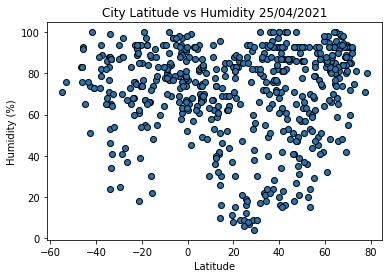

In [65]:
# plot lat vs humidity 

# set x and y values 
x_values = city_list_df['Lat']
y_values = city_list_df["Humidity"]

# plot graph and add titles & labels 
plt.scatter(x_values,y_values, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("City Latitude vs Humidity 25/04/2021")

# Save png file
plt.savefig("../Output/lat_vs_humidity.png")

plt.show()


# Analysis - the equator doesnt seem to have an impact on humidity. Some of the cities would be in a cold 
# part of the world, however still have a high humidity 

## Latitude vs. Cloudiness Plot

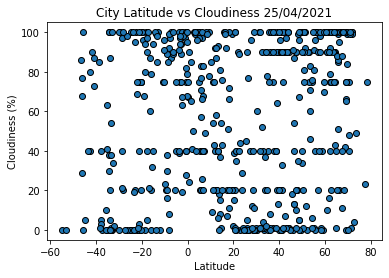

In [66]:
# plot lat vs cloudiness 

# set x and y values 
x_values = city_list_df['Lat']
y_values = city_list_df["Cloudiness"]

# plot graph and add titles & labels 
plt.scatter(x_values,y_values, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("City Latitude vs Cloudiness 25/04/2021")

# Save png file
plt.savefig("../Output/lat_vs_Cloudiness.png")

plt.show()


# Analysis - the cloudiness of each city doesnt seem to have much correlation to the equator. 
# If we look at a lat of 40 it could be Asia, Europe of US. Cloudiness varies from 0% to 100%

## Latitude vs. Wind Speed Plot

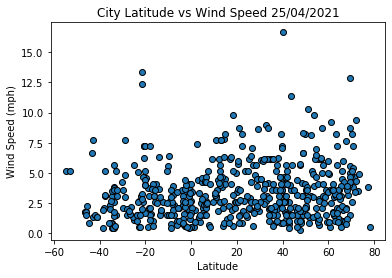

In [67]:
# plot lat vs wind speed 

# set x and y values 
x_values = city_list_df['Lat']
y_values = city_list_df["Wind Speed"]

# plot graph and add titles & labels 
plt.scatter(x_values,y_values, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("City Latitude vs Wind Speed 25/04/2021")

# Save png file
plt.savefig("../Output/lat_vs_Windspeed.png")

plt.show()


# Analysis - Again there doesnt seem to be much correlation between wind speed and Latitude. speeds look
# consistent on both sides with a few outliers. 

## Linear Regression

In [42]:
# create northern hemisphere dataframe 

north_df = city_list_df[city_list_df['Lat'] >= 0]
north_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,kharan,28.5833,65.4167,35.90,9.0,0.0,3.95,PK,1.619342e+09
7,katsuura,35.1333,140.3000,20.00,49.0,40.0,3.60,JP,1.619342e+09
8,davenda,53.5556,119.3170,15.74,15.0,83.0,3.91,RU,1.619342e+09
10,yar-sale,66.8333,70.8333,-0.01,98.0,100.0,4.00,RU,1.619342e+09
11,kondopoga,62.2057,34.2614,7.00,87.0,90.0,3.00,RU,1.619342e+09
...,...,...,...,...,...,...,...,...,...
591,laguna,38.4210,-121.4238,12.22,71.0,1.0,2.57,US,1.619342e+09
593,beboto,8.2668,16.9390,30.11,48.0,99.0,4.05,TD,1.619342e+09
594,belomorsk,64.5232,34.7668,7.97,77.0,43.0,3.06,RU,1.619342e+09
595,batagay-alyta,67.8006,130.4114,0.20,84.0,100.0,2.02,RU,1.619342e+09


In [43]:
# Create southern hemisphere dataframe 

south_df = city_list_df[city_list_df['Lat'] < 0]
south_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,hobart,-42.8794,147.3294,14.00,51.0,40.0,7.72,AU,1.619342e+09
3,itarema,-2.9248,-39.9167,24.17,90.0,89.0,3.39,BR,1.619342e+09
4,bredasdorp,-34.5322,20.0403,15.00,88.0,100.0,3.09,ZA,1.619342e+09
6,ushuaia,-54.8000,-68.3000,8.00,71.0,0.0,5.14,AR,1.619341e+09
9,vaini,-21.2000,-175.2000,24.00,94.0,75.0,2.57,TO,1.619342e+09
...,...,...,...,...,...,...,...,...,...
574,madimba,-10.4000,40.3333,28.00,83.0,75.0,5.14,TZ,1.619342e+09
575,noumea,-22.2763,166.4572,23.00,94.0,75.0,1.54,NC,1.619342e+09
579,hluti,-27.2167,31.6167,23.82,44.0,0.0,1.87,SZ,1.619342e+09
581,buin,-33.7333,-70.7500,15.56,87.0,0.0,1.45,CL,1.619342e+09


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [87]:
# Import lingress for graphs

from scipy import stats
from scipy.stats import linregress
import scipy.stats as st



The r-value is: -0.87


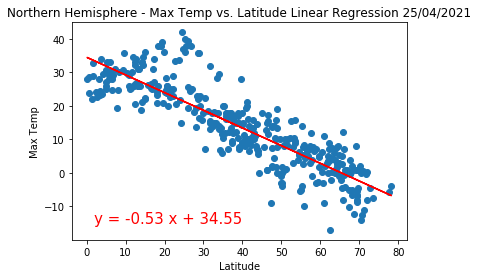

In [91]:
# plot lat vs max temp north 


# define x and y values 
x_values = north_df['Lat']
y_values = north_df["Max Temp"]

# Get the regression on max temp vs lat 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Get the line equation 
line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))

# plot graph and add titles & labels 
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression 25/04/2021")

# place equation and line on graph
plt.annotate(line_eq,(2,-15),fontsize=15,color="red")
plt.plot(x_values,regress_values,"r-")

# Save png file
plt.savefig("../Output/lat_vs_Temp_regress_north.png")

# get pearson r value. Set the columns and calc 

r_lat_n = north_df["Lat"]
r_temp_n = north_df["Max Temp"]

correlation= st.pearsonr(r_lat_n, r_temp_n)

# Print r value
print(f'The r-value is: {round(correlation[0],2)}')

plt.show()



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.74


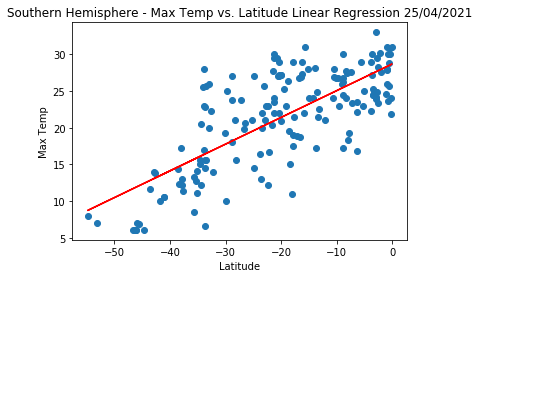

In [92]:
# plot lat vs max temp south 

# define x and y values 
x_values = south_df['Lat']
y_values = south_df["Max Temp"]

# Get the regression on max temp vs lat 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Get the line equation 
line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))

# plot graph and add titles & labels 
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression 25/04/2021")

# place equation and line on graph
plt.annotate(line_eq,(2,-15),fontsize=15,color="red")
plt.plot(x_values,regress_values,"r-")

# Save png file
plt.savefig("../Output/lat_vs_Temp_regress_south.png")


# get pearson r value. Set the columns and calc 

r_lat_s = south_df["Lat"]
r_temp_s = south_df["Max Temp"]

correlation= st.pearsonr(r_lat_s, r_temp_s)

# Print r value
print(f'The r-value is: {round(correlation[0],2)}')

plt.show()



####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.21


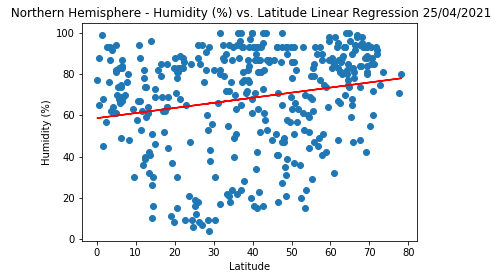

In [94]:
# plot lat vs humidity

# define x and y values 
x_values = north_df['Lat']
y_values = north_df["Humidity"]


# Get the regression on humidity vs lat 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Get the line equation 
line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))

# plot graph and add titles & labels 
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(" Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression 25/04/2021")

# place equation and line on graph
plt.annotate(line_eq,(2,-15),fontsize=15,color="red")
plt.plot(x_values,regress_values,"r-")

# Save png file
plt.savefig("../Output/lat_vs_humidity_north.png")

# get pearson r value. Set the columns and calc 

# r_lat_n = north_df["Lat"] same value for all north 
r_hum_n = north_df["Humidity"]

correlation= st.pearsonr(r_lat_n, r_hum_n)

# Print r value
print(f'The r-value is: {round(correlation[0],2)}')

plt.show()



####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.12


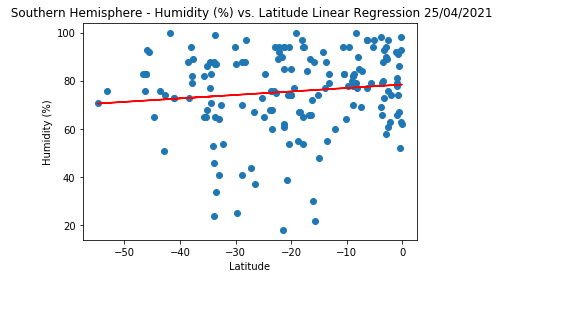

In [95]:
# plot lat vs humidity 

# define x and y values 
x_values = south_df['Lat']
y_values = south_df["Humidity"]


# Get the regression on humidity vs lat 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Get the line equation 
line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))

# plot graph and add titles & labels 
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(" Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression 25/04/2021")

# place equation and line on graph
plt.annotate(line_eq,(2,-15),fontsize=15,color="red")
plt.plot(x_values,regress_values,"r-")

# Save png file
plt.savefig("../Output/lat_vs_humidity_south.png")

# get pearson r value. Set the columns and calc 

# r_lat_s = south_df["Lat"] same value for all south 
r_hum_s = south_df["Humidity"]

correlation= st.pearsonr(r_lat_s, r_hum_s)

# Print r value
print(f'The r-value is: {round(correlation[0],2)}')

plt.show()



####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.15


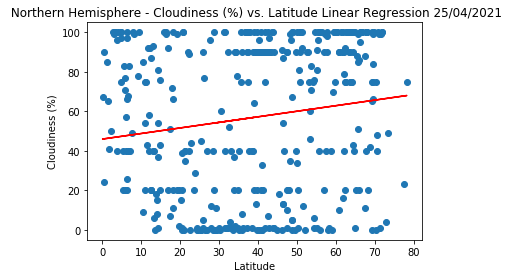

In [96]:
# plot lat vs cloudiness  

# define x and y values 
x_values = north_df['Lat']
y_values = north_df["Cloudiness"]


# Get the regression on cloudiness vs lat 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Get the line equation 
line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))

# plot graph and add titles & labels 
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(" Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression 25/04/2021")

# place equation and line on graph
plt.annotate(line_eq,(2,-15),fontsize=15,color="red")
plt.plot(x_values,regress_values,"r-")

# Save png file
plt.savefig("../Output/lat_vs_cloudiness_north.png")

# get pearson r value. Set the columns and calc 

# r_lat_n = north_df["Lat"] same value for all north 
r_cloud_n = north_df["Cloudiness"]

correlation= st.pearsonr(r_lat_n, r_cloud_n)

# Print r value
print(f'The r-value is: {round(correlation[0],2)}')

plt.show()



####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.34


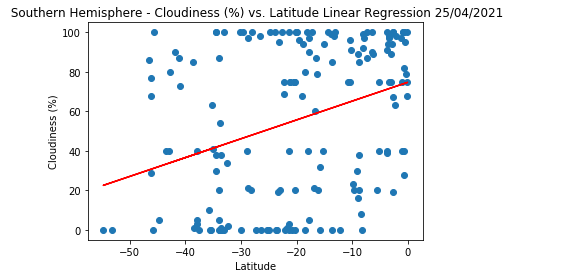

In [97]:
# plot lat vs cloudiness

# define x and y values 
x_values = south_df['Lat']
y_values = south_df["Cloudiness"]


# Get the regression on cloudiness vs lat 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Get the line equation 
line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))

# plot graph and add titles & labels 
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(" Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression 25/04/2021")

# place equation and line on graph
plt.annotate(line_eq,(2,-15),fontsize=15,color="red")
plt.plot(x_values,regress_values,"r-")

# Save png file
plt.savefig("../Output/lat_vs_cloudiness_south.png")

# get pearson r value. Set the columns and calc 

# r_lat_s = south_df["Lat"] same value for all south 
r_cloud_s = south_df["Cloudiness"]

correlation= st.pearsonr(r_lat_s, r_cloud_s)

# Print r value
print(f'The r-value is: {round(correlation[0],2)}')

plt.show()



####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04


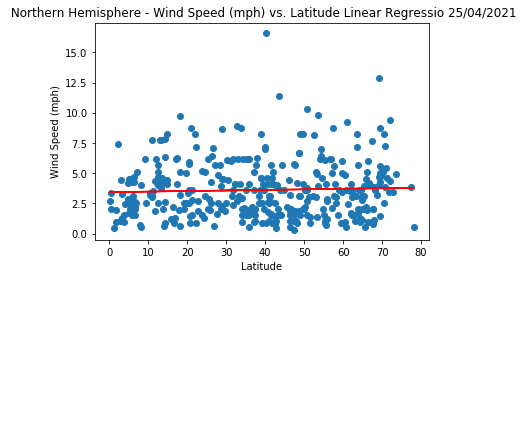

In [98]:
# plot lat vs wind speed

# define x and y values 
x_values = north_df['Lat']
y_values = north_df["Wind Speed"]


# Get the regression on wind speed vs lat 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Get the line equation 
line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))

# plot graph and add titles & labels 
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(" Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regressio 25/04/2021")

# place equation and line on graph
plt.annotate(line_eq,(2,-15),fontsize=15,color="red")
plt.plot(x_values,regress_values,"r-")

# Save png file
plt.savefig("../Output/lat_vs_windspeed_north.png")


# get pearson r value. Set the columns and calc 

# r_lat_n = north_df["Lat"] same value for all north 
r_wind_n = north_df["Wind Speed"]

correlation= st.pearsonr(r_lat_n, r_wind_n)

# Print r value
print(f'The r-value is: {round(correlation[0],2)}')

plt.show()



####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.07


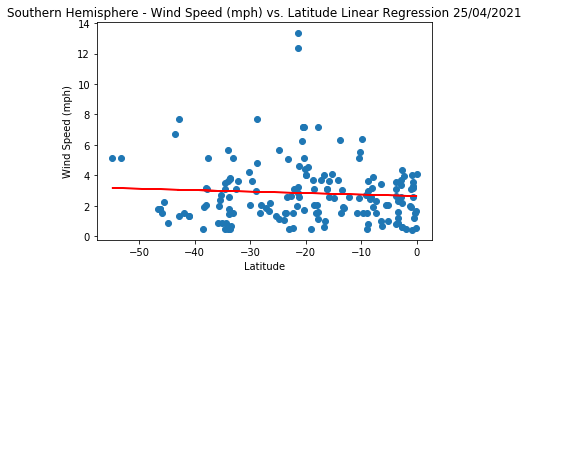

In [99]:
# plot lat vs wind speed

# define x and y values 
x_values = south_df['Lat']
y_values = south_df["Wind Speed"]


# Get the regression on wind speed vs lat 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Get the line equation 
line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))

# plot graph and add titles & labels 
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression 25/04/2021")

# place equation and line on graph
plt.annotate(line_eq,(2,-15),fontsize=15,color="red")
plt.plot(x_values,regress_values,"r-")

# Save png file
plt.savefig("../Output/lat_vs_windspeed_south.png")

# get pearson r value. Set the columns and calc 

# r_lat_s = south_df["Lat"] same value for all south 
r_wind_s = south_df["Wind Speed"]

correlation= st.pearsonr(r_lat_s, r_wind_s)

# Print r value
print(f'The r-value is: {round(correlation[0],2)}')

plt.show()

